## 25일차 강의 (2021.8.6)
# 머신러닝과 신경망

### 확인 문제
- 로지스틱회귀는 선형회귀에 시그모이드함수를 적용한 것이다.
- 시그모이드함수의 입력(x축)과 출력(y축)은 각각 무엇인가?
> - 입력 : 선형회귀의 출력<br>
> - 출력 : 확률값 (0~1) 
- 로지스틱회귀의 출력값(예측값)이 0.4이다. 개가 0, 고양이가 1인 분류 문제라면 각 동물일 확률은 얼마인가?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

$$ sigmoid(x) = \frac {1} {1 + e^{-x}} $$

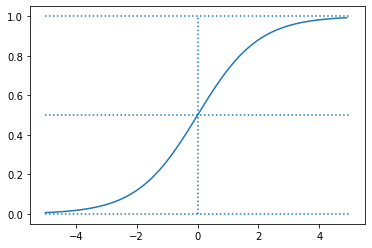

In [6]:
x = np.arange(-5,5,0.1)
y = 1/(1+np.exp(-x))

plt.plot(x,y)
plt.hlines([0,0.5,1], -5, 5, linestyles=':')
plt.vlines([0],0,1,linestyles=':')

### 로지스틱 회귀

In [12]:
x = np.array([0.5, 0.3, 0.9])
y = 1

w = np.array([0.1, 0.2, -0.1])
b = 0

In [10]:
# 로지스틱회귀의 출력값(확률)을 계산해보자
z = (x*w).sum() + b # x@w + b
pred_y = 1/(1+np.exp(-z))
pred_y

0.5049998333399998

In [13]:
# MSE (주로 선형회귀에 적용하는 오차값 - 결과가 실수값인 경우)
Error = (y-pred_y)**2
Error

0.24502516499342802

In [15]:
# Cross entropy (로지스틱회귀에서 적용하는 오차값 - 결과가 확률값 일때)
Error = -np.log(pred_y) # y=1 이므로
Error

0.6831971797266342

In [18]:
X = np.array([[0.5, 0.3, 0.9], [0.1,0.4,0.7], [0.6,0.8,0.5]])
y = np.array([1, 0, 1])

In [22]:
(X*w).sum(axis=1)+b

array([0.02, 0.02, 0.17])

In [27]:
z = X@w + b
pred_y = 1/(1+np.exp(-z))
pred_y

array([0.50499983, 0.50499983, 0.54239794])

In [29]:
# MSE
Error = ((y-pred_y)**2).mean()
Error

0.23648321375813666

In [30]:
# Cross Entropy
Error = (-np.log(pred_y[0]) - np.log(1-pred_y[1]) - np.log(pred_y[2]))/3
Error

0.6660498994412971

- 기울기 직접 계산
- 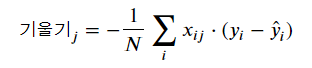

In [31]:
X

array([[0.5, 0.3, 0.9],
       [0.1, 0.4, 0.7],
       [0.6, 0.8, 0.5]])

In [32]:
(y-pred_y)

array([ 0.49500017, -0.50499983,  0.45760206])

In [33]:
X*((y-pred_y).reshape(3,1))

array([[ 0.24750008,  0.14850005,  0.44550015],
       [-0.05049998, -0.20199993, -0.35349988],
       [ 0.27456124,  0.36608165,  0.22880103]])

In [34]:
-(X*((y-pred_y).reshape(3,1))).mean(axis=0)

array([-0.15718711, -0.10419392, -0.10693377])

In [40]:
-(y-pred_y)@X/3

array([-0.15718711, -0.10419392, -0.10693377])